In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
data = np.loadtxt('data.txt')

In [3]:
x = data[:, [0,2,4,6]].flatten(order='F')

In [4]:
y = data[:, [1,3,5,7]].flatten(order='F')

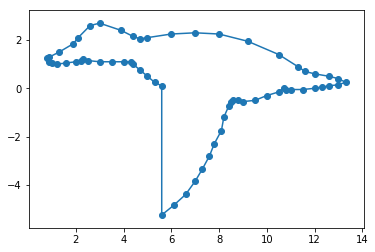

In [5]:
plt.plot(x,y)
plt.scatter(x,y)

Because I used linear interpolation we can see that this a polygon. We can then use the Shoelace formula to calculate the area https://en.wikipedia.org/wiki/Shoelace_formula

First we need to order the points so that they are in clockwise direction. We can do this by sorting the points above the mean by ascending x order, and those below the mean in descending x order.

In [6]:
gind = np.where(y>=np.mean(y))
lind = np.where(y<np.mean(y))

xg = np.sort(x[gind])
xl = -np.sort(-x[lind])

yg = y[gind]
yl = y[lind]

xs = np.append(xg,xl)
ys = np.append(yg,yl)

We can check that the points are ordered correctly

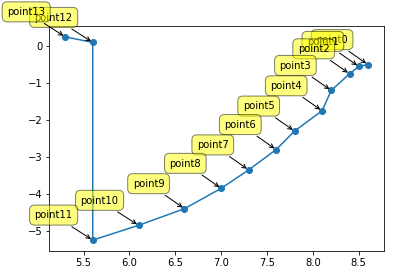

In [7]:
a = 50
n = 64
N = len(xs[a:n])
labels = ['point{0}'.format(i) for i in range(N)]

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    xs[a:n], ys[a:n], marker='o')

for label, x, y in zip(labels, xs[a:n], ys[a:n]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.plot(xs[a:n],ys[a:n])
plt.show()


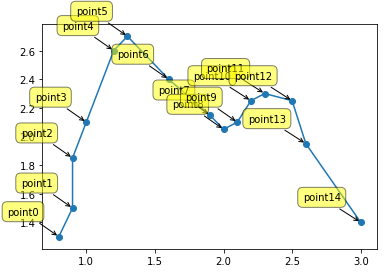

In [8]:
a = 0
n = 15
N = len(xs[a:n])
labels = ['point{0}'.format(i) for i in range(N)]

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    xs[a:n], ys[a:n], marker='o')

for label, x, y in zip(labels, xs[a:n], ys[a:n]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.plot(xs[a:n],ys[a:n])
plt.show()


In [9]:
def PolyArea1(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [10]:
def Shoelace(x,y):
    n = len(x)
    s = 0.
    for i in range(0,n-1):
        s += x[i]*y[i+1]-x[i+1]*y[i]
    s+=x[n-1]*y[0] - x[0]*y[n-1]
    return np.abs(0.5*s)

In [11]:
Shoelace(xs,ys)

22.62750000000001

The area is about 22.628 square units